In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('new_appdata10.csv')
df.head()

,user,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,1,0,1,0,...,0,0,0,0,0,10,0,2,0,1


#### Data Preprocessing

In [3]:
y = df['enrolled']
x = df.drop(columns='enrolled')

In [4]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [6]:
# we do not need the user column in the model building but would be needed in making prediction
# treating the user column
train_identifier = X_train['user'] 
X_train = X_train.drop(columns='user')

test_identifier = X_test['user'] 
X_test = X_test.drop(columns='user')

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
std_sc = StandardScaler()

# standardizing the data set
X_train2 = pd.DataFrame(std_sc.fit_transform(X_train))
X_test2 = pd.DataFrame(std_sc.transform(X_test))

# setting the column names
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

#setting the index numbering 
X_train2.index = X_train.index.values 
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

#### Model Building

In [16]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression(random_state=0, penalty = 'l1', solver='liblinear') # we are adding the penlty L1 to change the regression model from a regular logistic regression model to a L1 regularization regression model
# we applied this to penalize any variable that might be strongly correlated with the response variable, similar to what we did in funneling
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3759, 1182],
       [1178, 3881]], dtype=int64)

In [22]:
accuracy_score(y_test, y_pred)

0.764

In [23]:
# to make sure this is not happening due to overfitting issues w elook at the precision
precision_score(y_test,y_pred)

0.7665415761406281

In [25]:
 recall_score(y_test,y_pred)

0.7671476576398498

In [26]:
f1_score(y_test,y_pred)

0.7668444971349536

Test Data Accuracy: 0.7640


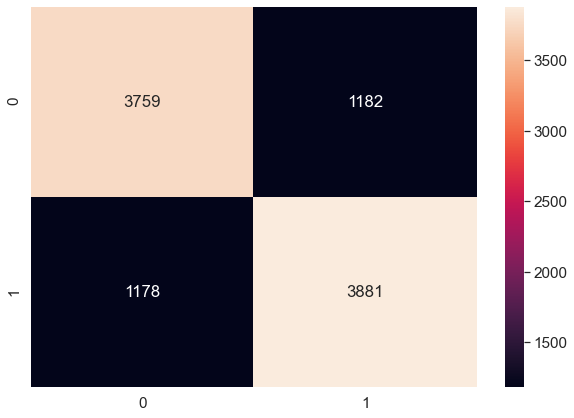

In [28]:
df_cm = pd.DataFrame(cm,index=(0,1),columns=(0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g')
print('Test Data Accuracy: %0.4f' % accuracy_score(y_test,y_pred))

### K fold cross validation

In [29]:
from sklearn.model_selection import cross_val_score

In [32]:
accuracies = cross_val_score(estimator= clf, X= X_train, y= y_train, cv = 10)
print("logistic Accuracy: %0.3f (+/- %0.3f)"%(accuracies.mean(), accuracies.std()*2))

logistic Accuracy: 0.762 (+/- 0.011)


### Formatting Final Results

In [33]:
final_result = pd.concat([y_test, test_identifier], axis=1).dropna()
final_result['predicted_result']= y_pred
final_result[['user','enrolled','predicted_result']].reset_index(drop=True)

,user,enrolled,predicted_result
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
